In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import random


In [3]:
# with open('results/experiments.json', 'r') as f:
#     data = json.load(f)
# df = pd.DataFrame(data)

In [4]:
Xdev = np.load('/home/t-chepan/projects/MS-intern-project/encoded_data_clip_fast/Xdev.npy')
print(Xdev.shape)

(13863, 446)


In [5]:
ydev = np.load('/home/t-chepan/projects/MS-intern-project/encoded_data_clip_fast/ydev.npy')
print(ydev.shape)

(13863, 12)


In [6]:
features = pd.read_csv('/home/t-chepan/projects/MS-intern-project/encoded_data_clip_fast/encoded_columns_name.txt', delimiter='\t', header=None)
features.columns = ['cols_name']

In [7]:
features

,cols_name
0,AllupSeats
1,EXOSubscriptionsCount
2,OD4BSubscriptionsCount
3,SfBSubscriptionsCount
4,TeamsSubscriptionsCount
5,PaidCount
6,ProjectSubscriptionsCount
7,SPOSubscriptionsCount
8,ActivatedSubscriptionTotalCount
9,VisioSubscriptionsCount


In [8]:
Xyoung = np.load('/home/t-chepan/projects/MS-intern-project/encoded_data_clip_fast/Xyoung.npy')
Xyoung.shape

(478934, 446)

In [9]:
yyoung = np.load('/home/t-chepan/projects/MS-intern-project/encoded_data_clip_fast/yyoung.npy')
yyoung.shape
print(yyoung.shape)

(478934, 12)


In [10]:
wl_names = [
     'AR_exchange_06',
 'AR_sharepoint_06',
 'AR_skype_06',
 'AR_teams_06',
 'AR_od4b_06',
 'AR_onenote_06',
 'AR_word_06',
 'AR_excel_06',
 'AR_powerpoint_06',
 'AR_outlook_06',
 'AR_eslt_06',
 'AR_officeclient_06'
]

## Check the usage distribution for Dev vs Test, and Dev vs Train

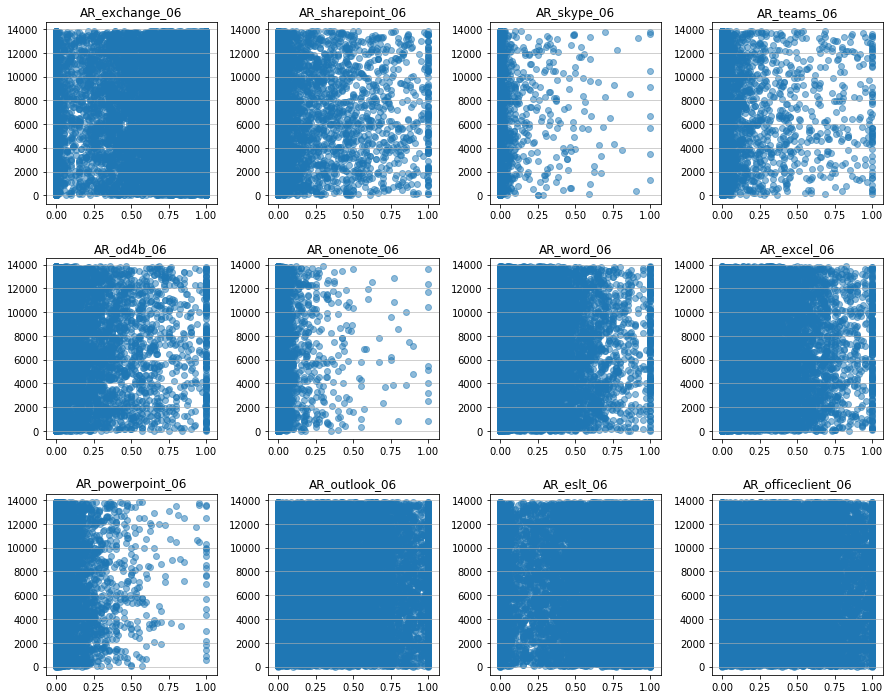

In [11]:
# ydev_clip = np.clip(ydev, 0, 10)

fig = plt.figure(figsize=(15, 12))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
n_max = ydev.shape[0]

for i in range(0, 12):
    
    ax = fig.add_subplot(3, 4, (i+1))
    plt.grid(axis='y', alpha=0.75)
    ax.scatter(x=ydev[:,i], y=range(0,n_max), alpha=0.5)
    ax.set_title(wl_names[i])
#               ,fontsize=14, ha='center')

# fig.savefig('plots/ydev_usage_scatter.png')

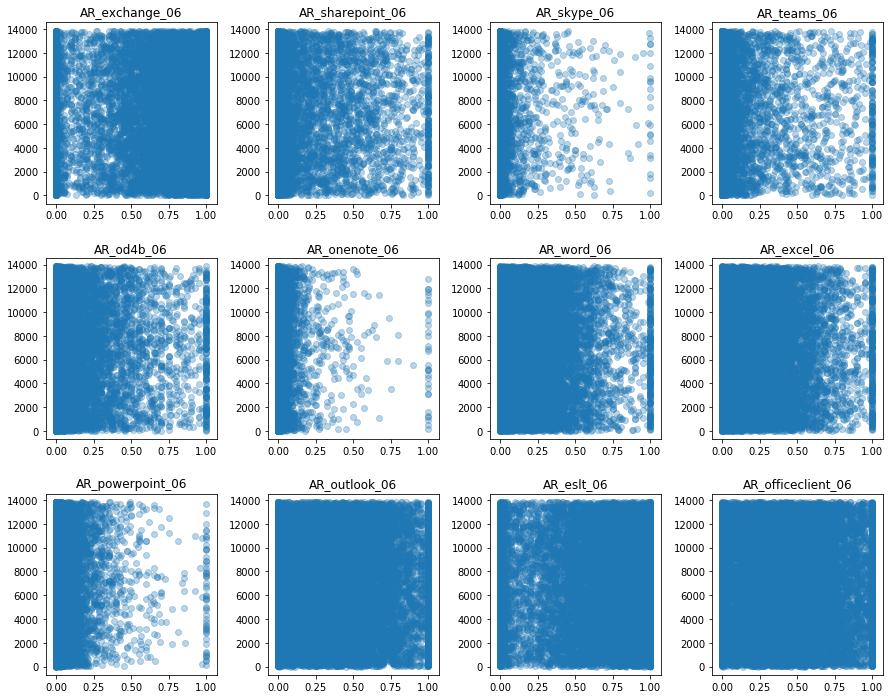

In [12]:
n_max = ydev.shape[0]
yyoung_sample = yyoung[:n_max,:]
# ytest_clip = np.clip(ytest_sample, 0, 10)

fig = plt.figure(figsize=(15, 12))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i in range(0, 12):
    ax = fig.add_subplot(3, 4, (i+1))
    ax.scatter(x=yyoung_sample[:,i], y=range(0,n_max), alpha=0.3)
    ax.set_title(wl_names[i])
    
# fig.savefig('plots/ytest_usage_scatter.png')

In [13]:
ydev_mean = np.mean(ydev, axis=0).reshape((12,1))
yyoung_mean = np.mean(yyoung, axis=0).reshape((12,1))
data = np.concatenate([ydev_mean, yyoung_mean], axis=1)
df_mean_usage = pd.DataFrame(data=data, index=wl_names, columns=['ydev_mean', 'yyoung_mean'])
df_mean_usage

,ydev_mean,yyoung_mean
AR_exchange_06,0.622064,0.653626
AR_sharepoint_06,0.052800,0.087627
AR_skype_06,0.006455,0.014532
AR_teams_06,0.027530,0.058768
AR_od4b_06,0.083543,0.107145
AR_onenote_06,0.011270,0.016480
AR_word_06,0.175515,0.204284
AR_excel_06,0.185720,0.223011
AR_powerpoint_06,0.033558,0.044621
AR_outlook_06,0.355996,0.401185


In [14]:
# dev_mean = np.mean(ydev, axis=0)
# train_mean = np.mean(ytrain, axis=0)

# print(dev_mean - train_mean)

In [15]:
# dev_std = np.std(ydev, axis=0)
# train_std = np.std(ytrain, axis=0)

# print(dev_std - train_std)

In [16]:
hasTrial_index = features.loc[features['cols_name'] == 'TrialSubscriptionsCount'].index

In [17]:
mask_dev_noTrial = np.where(Xdev[:,hasTrial_index] == 0, 1, 0)
mask_young_noTrial = np.where(Xyoung[:,hasTrial_index] == 0, 1, 0)

In [18]:
mask_young_noTrial.sum()

0

In [19]:
total_index = features.loc[features['cols_name'] == 'PaidCount'].index
exo_index = features.loc[features['cols_name'] == 'PaidEXOSeats'].index
spo_index = features.loc[features['cols_name'] == 'PaidSPOSeats'].index
od4b_index = features.loc[features['cols_name'] == 'PaidOD4BSeats'].index
teams_index = features.loc[features['cols_name'] == 'PaidTeamsSeats'].index
sfb_index = features.loc[features['cols_name'] == 'PaidSFBSeats'].index
office_index = features.loc[features['cols_name'] == 'PaidOfficeSeats'].index

mask_exo = np.where(Xdev[:,exo_index] > 0, 1, 0)
mask_spo = np.where(Xdev[:,spo_index] > 0, 1, 0)
mask_sfb = np.where(Xdev[:,sfb_index] > 0, 1, 0)
mask_teams = np.where(Xdev[:,teams_index] > 0, 1, 0)
mask_od4b = np.where(Xdev[:,od4b_index] > 0, 1, 0)
mask_eslt = np.where(Xdev[:,total_index] > 0, 1, 0)
mask_office = np.where(Xdev[:,office_index] > 0, 1, 0)

mask_office_all = np.ones((Xdev.shape[0], 5))

for i in range(5):
    mask_office_all[:,i] = mask_office[:,0]
    
mask_dev = np.concatenate([mask_exo, mask_spo, mask_sfb, mask_teams, mask_od4b, 
                       mask_office_all, mask_eslt, mask_office], axis=1)

In [20]:
mask_dev.shape

(13863, 12)

In [21]:
mask_exo_y = np.where(Xyoung[:,exo_index] > 0, 1, 0)
mask_spo_y = np.where(Xyoung[:,spo_index] > 0, 1, 0)
mask_sfb_y = np.where(Xyoung[:,sfb_index] > 0, 1, 0)
mask_teams_y = np.where(Xyoung[:,teams_index] > 0, 1, 0)
mask_od4b_y = np.where(Xyoung[:,od4b_index] > 0, 1, 0)
mask_eslt_y = np.where(Xyoung[:,total_index] > 0, 1, 0)
mask_office_y = np.where(Xyoung[:,office_index] > 0, 1, 0)

mask_office_all_y = np.ones((Xyoung.shape[0], 5))

for i in range(5):
    mask_office_all_y[:,i] = mask_office_y[:,0]
    
mask_young = np.concatenate([mask_exo_y, mask_spo_y, mask_sfb_y, mask_teams_y, mask_od4b_y, 
                       mask_office_all_y, mask_eslt_y, mask_office_y], axis=1)

In [22]:
purchased_dev = ydev * mask_dev
purchased_young = yyoung * mask_young

In [23]:
purchased_dev_mean = (np.sum(purchased_dev, axis=0) / np.sum(mask_dev, axis=0)).reshape((12,1))
purchased_young_mean = (np.sum(purchased_young, axis=0) / np.sum(mask_young, axis=0)).reshape((12,1))

In [24]:
data = np.concatenate([purchased_dev_mean, purchased_young_mean], axis=1)
df_mean_usage = pd.DataFrame(data=data, index=wl_names, columns=['purchased_ydev_mean', 'purchased_yyoung_mean'])
df_mean_usage

,purchased_ydev_mean,purchased_yyoung_mean
AR_exchange_06,0.725324,0.749814
AR_sharepoint_06,0.095313,0.132322
AR_skype_06,0.017999,0.029704
AR_teams_06,0.060571,0.098581
AR_od4b_06,0.075416,0.094937
AR_onenote_06,0.025905,0.119883
AR_word_06,0.492958,0.553121
AR_excel_06,0.559800,0.562641
AR_powerpoint_06,0.129205,0.222923
AR_outlook_06,0.672464,0.750050


In [26]:
# pal = dict(ydev="seagreen", yyoung="gray")
# g = sns.FacetGrid(tips, hue="time", palette=pal, height=5)
# g.map(plt.scatter, "total_bill", "tip", s=50, alpha=.7, linewidth=.5, edgecolor="white")
# g.add_legend();



# ordered_days = wl_names
# g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
#                   height=1.7, aspect=4,)
# g.map(sns.distplot, "total_bill", hist=False, rug=True);

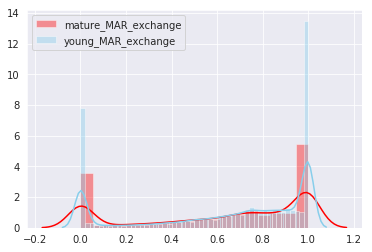

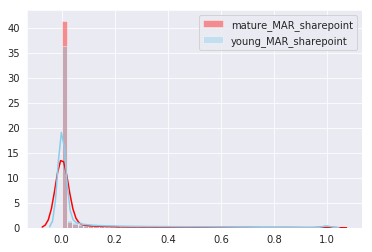

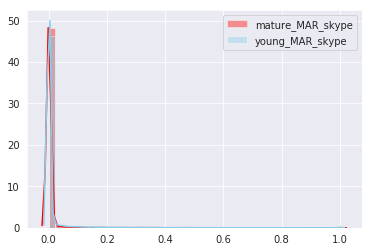

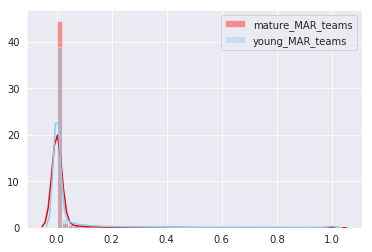

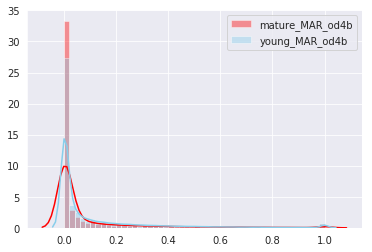

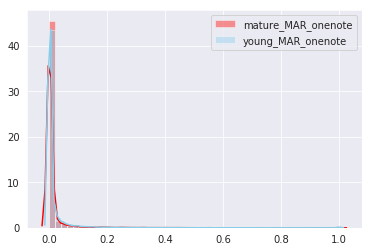

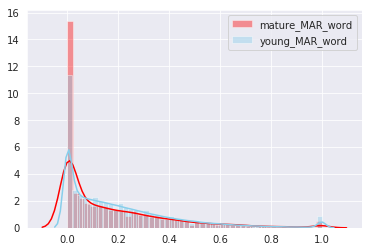

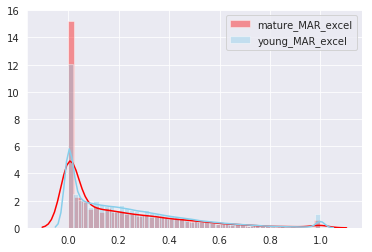

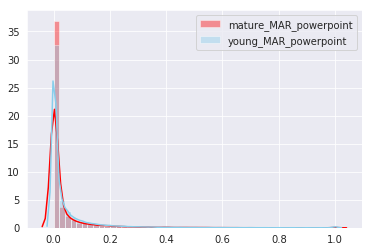

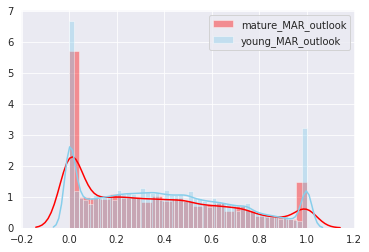

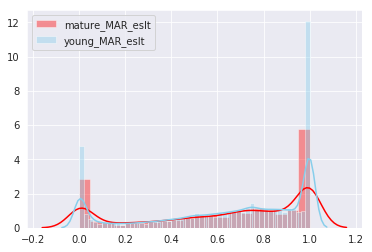

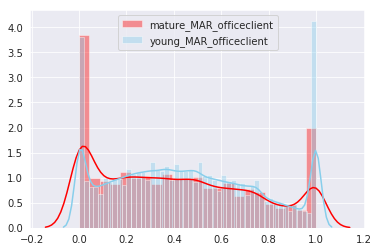

In [30]:
# ydev_clip = np.clip(ydev, 0, 2)
# ytest_clip = np.clip(ytest, 0, 2)

for i in range(0,12):
    sns.set_style('darkgrid')
    sns.distplot(ydev[:,i], color="red", label='mature_M{}'.format(wl_names[i][:-3]),# norm_hist=True,
                kde=True)
    sns.distplot(yyoung[:,i], color="skyblue", label='young_M{}'.format(wl_names[i][:-3]),# norm_hist=True
                kde=True)
    plt.legend()
    plt.savefig('/home/t-chepan/projects/MS-intern-project/plots//{}_mature_vs_young_usage_hist.png'.format(wl_names[i]))
    plt.show() 

In [16]:
# ydev_clip = np.clip(ydev, 0, 2)
# ytrain_clip = np.clip(ytrain, 0, 2)

# for i in range(0,12):
#     sns.set_style('darkgrid')
#     sns.distplot(ydev_clip[:,i], norm_hist=True, color="red", label='dev_{}'.format(wl_names[i]))
#     sns.distplot(ytrain_clip[:,i], norm_hist=True, color="skyblue", label='train_{}'.format(wl_names[i]))
#     plt.legend()
#     plt.savefig('plots/{}_devVStrain_usage_hist.png'.format(wl_names[i]))
#     plt.show() 